In [29]:
import os
from enum import Enum
import pandas as pd
import re
import numpy as np
from collections import Counter
import html
import matplotlib.pyplot as plt
import seaborn as sns
from metadata.metadata import ACL_metadata
from metadata import Gender
from collections import defaultdict
from itertools import chain

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

def clamp(x): 
    return max(0, min(x, 255))
def get_htmlcol(c):
    return "#{0:02x}{1:02x}{2:02x}".format(clamp(c[0]), clamp(c[1]), clamp(c[2]))

colors = [get_htmlcol(tableau20[2]),get_htmlcol(tableau20[0]),get_htmlcol(tableau20[4])]

for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)


In [3]:
acl = ACL_metadata()
auths = acl.auths
known = acl.known
known_f = acl.known_f
known_m = acl.known_m
unique_ids = acl.ids
new_unknown = acl.unk
df = acl.meta_df

Remember to use acl.modeling_files and modeling_df for topic modeling


In [7]:
for i in range(1980, 2015):
    year = df[df["year"] == i]
    papers = year["authors"]
    print(papers)

id
P80-1001                                 [Herskovits,Annette]
P80-1002                                       [Waltz,Davidl]
P80-1003                                   [Salveter,Sharonc]
P80-1004                                  [Carbonnell,Jaimeg]
P80-1005                                         [Slack,Jonm]
P80-1006                                     [Grosz,Barbaraj]
P80-1007                                     [Chafe,Wallacel]
P80-1008                                      [Cohen,Philipr]
P80-1009                                     [Joshi,Aravindk]
P80-1010                         [Linde,Charlotte, Goguen,Ja]
P80-1011                                     [Tannen,Deborah]
P80-1012                         [Joshi,Aravindk, Levy,Leons]
P80-1013                                      [Konolige,Kurt]
P80-1014                                    [Berwick,Robertc]
P80-1015                                    [Mcdonald,Davidd]
P80-1016                                    [Appelt,Douglase]
P80-1

id
E09-1001                                      [Copestake,Ann]
E09-1002                                   [Jong,Franciskade]
E09-1003                    [Abdulrauf,Sadaf, Schwenk,Holger]
E09-1004     [Agarwal,Apoorv, Biadsy,Fadi, Mckeown,Kathleenr]
E09-1005                          [Agirre,Eneko, Soroa,Aitor]
E09-1006                  [Agirre,Eneko, Lopezdelacalle,Oier]
E09-1007                   [Ahpine,Julien, Jacquet,Guillaume]
E09-1008     [Albrecht,Joshua, Hwa,Rebecca, Marai,Gelisabeta]
E09-1009                                   [Angelov,Krasimir]
E09-1010                                [Apidianaki,Marianna]
E09-1011             [Badr,Ibrahim, Zbib,Rabih, Glass,Jamesr]
E09-1012                  [Bangalore,Srinivas, Stent,Amandaj]
E09-1013                       [Brody,Samuel, Lapata,Mirella]
E09-1014                         [Cahill,Aoife, Forst,Martin]
E09-1015    [Carlos,Cohansujay, Choudhury,Monojit, Dandapa...
E09-1016                                      [Cartoni,Bruno]
E09-1

In [4]:
journals = set()
for i in range(1980, 2015):
    year = df[df["year"] == i]
    venues = year["venue"]
    for j in venues:
        journals.add(j)

In [5]:
numbers = defaultdict(list)
numbers_f = defaultdict(list)
numbers_m = defaultdict(list)
important_confs = ["ACL", "EMNLP","NAACL","EACL","COLING","CoNLL"]
for i in list(range(1980,2015)):
    year = df[df["year"] == i]
    venues = year["venue"]
    for j in important_confs:
        numbers[j].append(0)
        numbers_f[j].append(0)
        numbers_m[j].append(0)
    for index, paper in year.iterrows():
        authors = paper["authors"]
        conf = paper["venue"]
        if conf in important_confs and len(authors) == 1:
            numbers[conf][i-1980] += 1
            if authors[0] in known_f:
                numbers_f[conf][i-1980] += 1
            elif authors[0] in known_m:
                numbers_m[conf][i-1980] += 1
        

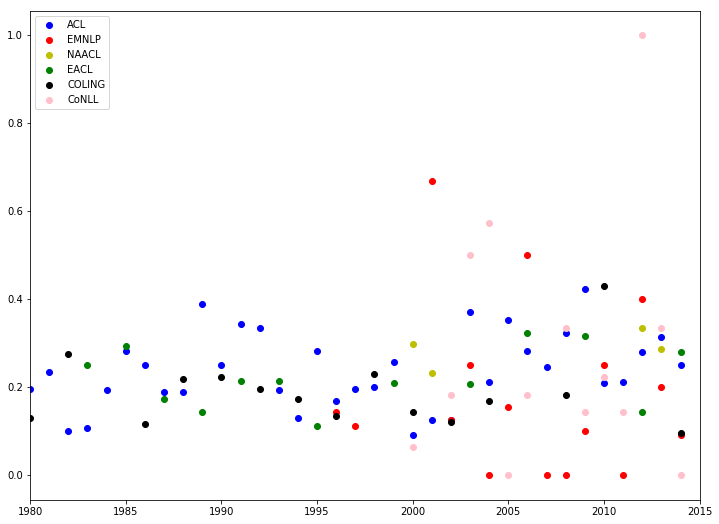

In [6]:
plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
colors = ['b', 'r', 'y', 'g','black', 'pink']
for j, conf in enumerate(important_confs):
    plt.scatter(0,0,label=conf,color=colors[j])
    for i in range(1980,2015):
        #if(numbers[conf[i-1980]] == 0): continue
        p = numbers[conf][i-1980]
        if p != 0:
            plt.scatter(i, numbers_f[conf][i-1980]/p ,color=colors[j])
plt.xlim(1980,2015)
plt.legend()

In [61]:
numbers = defaultdict(list)
numbers_f = defaultdict(list)
numbers_m = defaultdict(list)
total = np.array([0]*len(range(1980,2015)))
total_f = np.array([0]*len(range(1980,2015)))
important_confs = ["ACL", "EMNLP","EACL","COLING","CoNLL"]
for i in list(range(1980,2015)):
    year = df[df["year"] == i]
    venues = year["venue"]
    for j in important_confs:
        numbers[j].append(0)
        numbers_f[j].append(0)
        numbers_m[j].append(0)
    for index, paper in year.iterrows():
        authors = paper["authors"]
        conf = paper["venue"]
        for a in authors:
            if a in known_f:
                total_f[i-1980]+=1
            else:
                total[i-1980]+=1
        if conf in important_confs:
            for a in authors:
                numbers[conf][i-1980] += 1
                if a in known_f:
                    numbers_f[conf][i-1980] += 1
                elif a in known_m:
                    numbers_m[conf][i-1980] += 1
        

In [56]:
numbers_f["NAACL"]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 63,
 16,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 67,
 98,
 0]

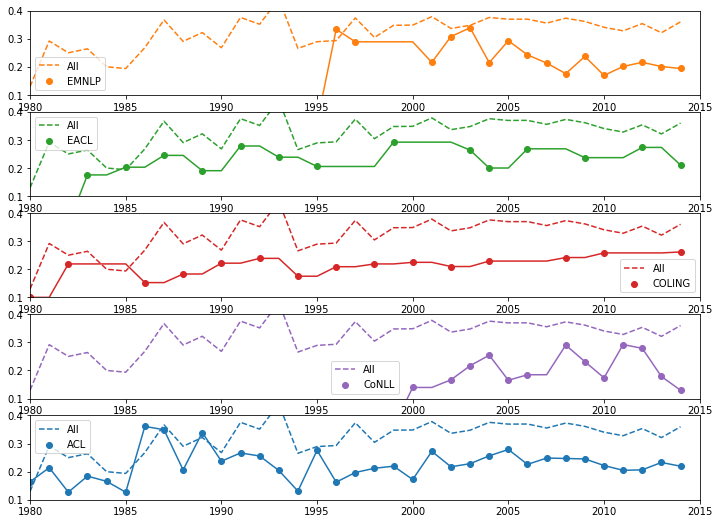

In [65]:
plt.subplots(1,5,figsize=(12, 9),sharey=True,sharex=True)

cols =[tableau20[0],tableau20[2],tableau20[4],tableau20[6],tableau20[8],tableau20[10]]
for j, conf in enumerate(important_confs):
    ax = plt.subplot("51{}".format(j))
    ax.scatter(0,0,label=conf,color=cols[j])
    pigs = defaultdict(list)
    for i in range(1980,2015):
        #if(numbers[conf[i-1980]] == 0): continue
        pigs[conf].append(0)
        p = numbers[conf][i-1980]
        if p >= 1:
            pigs[conf][i-1980] = numbers_f[conf][i-1980]/p
            ax.scatter(i, numbers_f[conf][i-1980]/p ,color=cols[j])
        else:
            if i > 1980:
                pigs[conf][i-1980] = pigs[conf][i-1981]
    ax.plot(range(1980, 2015), pigs[conf], '-',color=cols[j])
    ax.plot(range(1980, 2015), total_f/total, '--',color=cols[j],label="All")
    ax.set_xlim(1980,2015)
    ax.set_ylim(0.1,0.4)
    plt.legend()
plt.savefig("plots/TopConferences.pdf")

In [60]:
total_f/total

array([ 0.15079365,  0.18604651,  0.35460993,  0.12222222,  0.17924528,
        0.4375    ,  0.17258883,  0.17073171,  0.18636364,  2.59016393,
        1.11173184,  0.11313869,  1.45049505,  0.07163324,  1.28761062,
        0.15441176,  0.14246575,  0.05511811,  0.15728716,  0.11155378,
        0.08990826,  0.04545455,  0.11809524,  0.48400853,  1.08264463,
        0.90954774,  0.10301263,  2.5245283 ,  0.59236234,  0.10672854,
        0.08279125,  1.11507937,  1.225     ,  0.09440559,  0.10576923])

In [30]:
numbers = defaultdict(list)
numbers_f = defaultdict(list)
numbers_m = defaultdict(list)
important_confs = ["ACL", "EMNLP","NAACL","EACL","COLING","CoNLL"]
for i in list(range(1980,2015)):
    year = df[df["year"] == i]
    venues = year["venue"]
    for j in important_confs:
        numbers[j].append(0)
        numbers_f[j].append(0)
        numbers_m[j].append(0)
    for authors in year["authors"]:

defaultdict(list,
            {0: [],
             'ACL': [0],
             'COLING': [0],
             'CoNLL': [0],
             'EACL': [0],
             'EMNLP': [0],
             'NAACL': [0]})

In [26]:
numbers = defaultdict(list)
numbers_f = defaultdict(list)
numbers_m = defaultdict(list)
important_confs = ["ACL", "EMNLP","NAACL","EACL","COLING","CoNLL"]
for i in range(1980,2015):
    year = df[df["year"] == i]
    venues = year["venue"]
    for j in important_confs:
        n = len(venues[venues == j])
        numbers_f[j].append(0)
        numbers_m[j].append(0)
    for authors in year["authors"]:
        if len(authors) == 1:
            numbers
            if authors[0] in known_f:
                numbers_f[i-1980] += 1
            elif authors[0] in known_m:
                numbers_m[i-1980] += 1
        
for j in important_confs:
    print(j, numbers[j])

ACL [44, 36, 39, 25, 116, 40, 41, 34, 35, 34, 39, 56, 54, 47, 52, 56, 58, 73, 251, 83, 79, 70, 65, 110, 134, 134, 307, 204, 194, 231, 250, 344, 234, 394, 328]
EMNLP [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 23, 0, 0, 0, 21, 41, 28, 55, 146, 73, 131, 114, 163, 125, 149, 139, 205, 226]
NAACL [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97, 31, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 122, 168, 0]
EACL [0, 0, 0, 32, 0, 41, 0, 50, 0, 43, 0, 55, 0, 67, 0, 45, 0, 0, 0, 52, 0, 0, 0, 110, 1, 0, 92, 0, 0, 117, 0, 0, 116, 0, 163]
COLING [92, 0, 139, 0, 0, 0, 156, 0, 167, 0, 197, 0, 210, 0, 212, 0, 214, 0, 246, 0, 175, 0, 198, 0, 204, 0, 0, 0, 195, 0, 350, 0, 0, 0, 255]
CoNLL [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 0, 35, 35, 24, 39, 38, 0, 40, 46, 50, 51, 16, 42, 33]
